In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

markersX = 5           #X轴上标记的数量
markersY = 3            #EY轴上标记的数量
markerLength = 100#标记的长度，单位是像素
markerSeparation = 20#每个标记之间的间隔，单位像素
margins = markerSeparation #标记与边界之间的间隔
borderBits = 1 #标记的边界所占的bit位数
width = markersX * (markerLength + markerSeparation) - markerSeparation + 2 * margins
height =markersY * (markerLength + markerSeparation) - markerSeparation + 2 * margins
print(width)
print(height)

620
380


### 生成字典

In [2]:
# Aruco code position detection in the camera image plane
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
myByteList = []
for idx, code in enumerate(aruco_dict.bytesList):
    #遍历现有Aruco字典（aruco_dict.bytesList）中的每个编码（code）
    code = code[np.newaxis, :, :]
    # 将当前的code通过np.newaxis增加一个维度，以适配cv2.aruco.Dictionary_getBitsFromByteList函数的输入要求。
    bits = cv2.aruco.Dictionary_getBitsFromByteList(code, 4)
    #cv2.aruco.Dictionary_getBitsFromByteList函数将字节列表转换为位矩阵（bits）。
    bits = cv2.flip(bits, 1)
    #使用cv2.flip函数沿着水平方向（参数为1）翻转位矩阵，这可能是为了满足特定的标记识别要求或纠正方向。
    code = cv2.aruco.Dictionary_getByteListFromBits(bits)
    # 将翻转后的位矩阵(bits)重新转换为字节列表(code)，以便后续使用。
    myByteList.append(code[0])
    #将转换后的字节列表添加到myByteList中。
myByteList = np.stack(myByteList, axis=0)
my_aruco_dict = cv2.aruco.Dictionary(myByteList, 4)


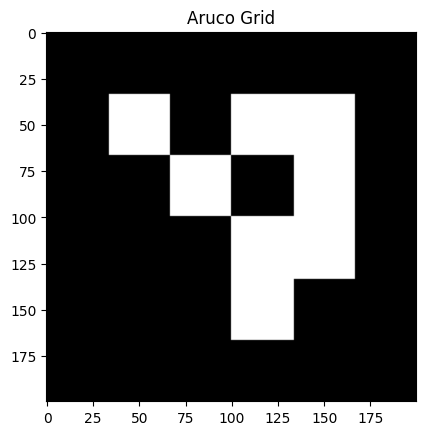

In [3]:

#dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
#board = cv2.aruco.GridBoard((markersX, markersY),float(markerLength),float(markerSeparation), dictionary)
#Aruco_img = cv2.aruco.drawPlanarBoard(board,(width,height),margins,borderBits=borderBits)

markerImage = cv2.aruco.generateImageMarker(aruco_dict, 0, 200)
#cv2.imshow('Flipped Aruco Marker', markerImage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


#board = cv2.aruco.GridBoard_create(markersX, markersY, float(markerLength),float(markerSeparation), dictionary)
#print(cv2.aruco.GridBoard.getGridSize(board))
#img= cv2.aruco_GridBoard.draw(board,(5000,6000),1)
plt.imshow(cv2.cvtColor(markerImage, cv2.COLOR_BGR2RGB))
plt.title('Aruco Grid')
plt.show()


 生成Aruco码棋盘

    markersX: X轴上标记的数量
    markersY: Y轴上标记的数量
    markerLength: 标记的长度，单位是像素
    markerSeparation: 每个标记之间的间隔，单位像素
    margins: 标记与边界之间的间隔
    borderBits: 标记的边界所占的bit位数
    showImage: 是否显示生成的图像



In [4]:
Aruco_img = cv2.imread('../gc_r3.jpg')
#读取一张特定的图像并使用 Aruco_detect 函数检测其中的Aruco标记，得到 anchors。
# Aruco code position detection in the camera image plane
def my_aruco_dict():
    aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
    myByteList = []
    for idx, code in enumerate(aruco_dict.bytesList):
        #遍历现有Aruco字典（aruco_dict.bytesList）中的每个编码（code）
        code = code[np.newaxis, :, :]
        # 将当前的code通过np.newaxis增加一个维度，以适配cv2.aruco.Dictionary_getBitsFromByteList函数的输入要求。
        bits = cv2.aruco.Dictionary_getBitsFromByteList(code, 4)
        #cv2.aruco.Dictionary_getBitsFromByteList函数将字节列表转换为位矩阵（bits）。
        bits = cv2.flip(bits, 1)
        #使用cv2.flip函数沿着水平方向（参数为1）翻转位矩阵，这可能是为了满足特定的标记识别要求或纠正方向。
        code = cv2.aruco.Dictionary_getByteListFromBits(bits)
        # 将翻转后的位矩阵(bits)重新转换为字节列表(code)，以便后续使用。
        myByteList.append(code[0])
        #将转换后的字节列表添加到myByteList中。
    myByteList = np.stack(myByteList, axis=0)
    return myByteList
my_aruco_dict = cv2.aruco.Dictionary(my_aruco_dict(), 4)

In [5]:
def checkacruco(corners,anchors,Aruco_img):
    fig, ax = plt.subplots()
    for corner in corners:
        points = corner.reshape(-1, 2)
        polygon = plt.Polygon(points, edgecolor='r')
        ax.add_patch(polygon)
    for anchor_id, center_point in anchors.items():
        plt.text(center_point[0], center_point[1], str(anchor_id), color='blue', fontsize=12)
    plt.imshow(Aruco_img, cmap='gray')
    plt.show()


In [6]:

def detectac(Aruco_img):
    parameters = cv2.aruco.DetectorParameters()
    # 检测标记
    anchors = {}
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(Aruco_img, my_aruco_dict, parameters=parameters)
    print(len(corners))
    #print(rejectedImgPoints)
    if ids is not None:
        corners = np.array(corners).reshape(-1, 4, 2)
        center_points = np.mean(corners, 1)
    for i, idx in enumerate(ids):
        idx = int(idx)
        anchors[idx] = center_points[i]
    return corners,anchors

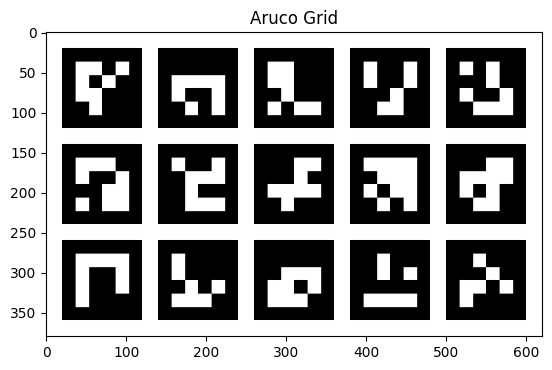

In [7]:
board = cv2.aruco.GridBoard((markersX, markersY),float(markerLength),float(markerSeparation), my_aruco_dict)
#board = cv2.aruco.GridBoard((markersX, markersY),float(markerLength),float(markerSeparation),aruco_dict)
generated_aruco_img = cv2.aruco.drawPlanarBoard(board,(width,height),margins,borderBits=borderBits)
# 显示图像

plt.imshow(cv2.cvtColor(generated_aruco_img, cv2.COLOR_BGR2RGB))
plt.title('Aruco Grid')
plt.show()


15


C:\Users\robert\AppData\Local\Temp\ipykernel_24100\1113005056.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(idx)


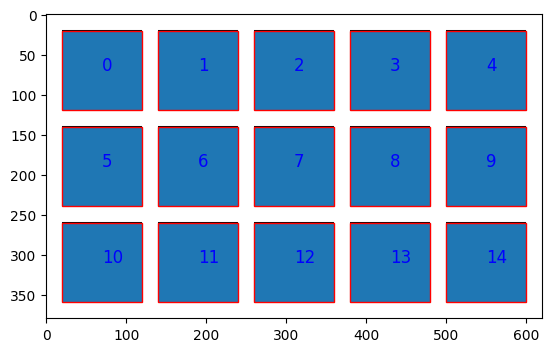

In [8]:
corners,anchors=detectac(generated_aruco_img)
checkacruco(corners,anchors,generated_aruco_img)

In [9]:
filtered_anchors=[]
for anchor_id, center_point in anchors.items():
    if anchor_id in [0, 4, 10, 14]:
        filtered_anchors.append(center_point)
re4corner=filtered_anchors

In [10]:
arucodir='..\Aruco\gc_new.png'
Aruco_img = cv2.imread(arucodir)
corners,anchors=detectac(Aruco_img)
checkacruco(corners,anchors,Aruco_img)
#img = cv2.imread('ac.png')
img = cv2.imread('./Demo/gc_new.png')

assert img is not None, "file could not be read, check with os.path.exists()"
height,width,ch = img.shape
filtered_anchors=[]
for anchor_id, center_point in anchors.items():
    if anchor_id in [0, 4, 10, 14]:
        filtered_anchors.append(center_point)


pts1 = np.float32(filtered_anchors)
#pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
pts2 = np.float32([[width,height],[0,height],[width,0],[0,0]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(width,height))
#plt.subplot(121),plt.imshow(img),plt.title('Input')
#plt.subplot(122),plt.imshow(dst),plt.title('Output')
cv2.imwrite("./Demo/gc_new_1.png",dst)
#plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\robert\AppData\Local\Temp\ipykernel_24100\2512986932.py:1: SyntaxWarning: invalid escape sequence '\A'
  arucodir='..\Aruco\gc_new.png'
C:\Users\robert\AppData\Local\Temp\ipykernel_24100\2512986932.py:1: SyntaxWarning: invalid escape sequence '\A'
  arucodir='..\Aruco\gc_new.png'


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\aruco\aruco_detector.cpp:860: error: (-215:Assertion failed) !_image.empty() in function 'cv::aruco::ArucoDetector::detectMarkers'


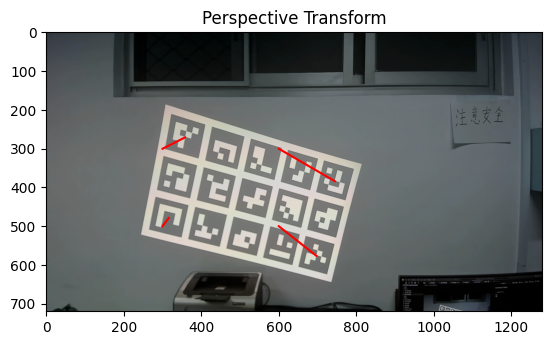

In [ ]:

#img = cv2.imread('ac.png')
generated_aruco_img = cv2.imread(arucodir)

assert generated_aruco_img is not None, "file could not be read, check with os.path.exists()"
height,width,ch = generated_aruco_img.shape
filtered_anchors=[]
for anchor_id, center_point in anchors.items():
    if anchor_id in [0, 4, 10, 14]:
        filtered_anchors.append(center_point)


pts1 = np.float32(filtered_anchors)
#pts2 = np.float32([[width,height],[0,height],[width,0],[0,0]])
pts2 = np.float32([[600,500],[300,500],[600,300],[300,300]])
#pts2 = np.float32(re4corner)

img = cv2.imread('../pic.png')
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1280,720))
#dst = cv2.warpPerspective(img,M,(300,200))
cv2.imwrite('../pic2.png',dst)
# 画图
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.imshow(generated_aruco_img)

for pt1, pt2 in zip(pts1, pts2):
    ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')

ax.set_title('Perspective Transform')
plt.show()




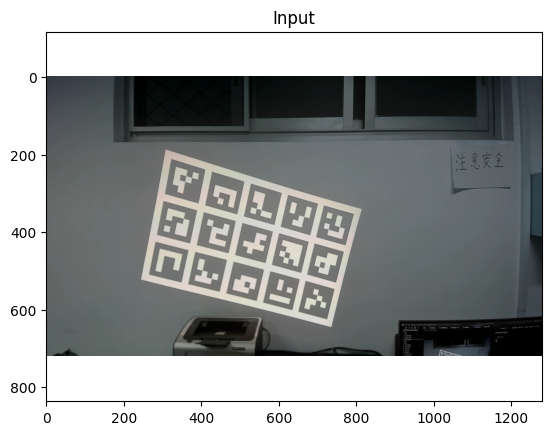

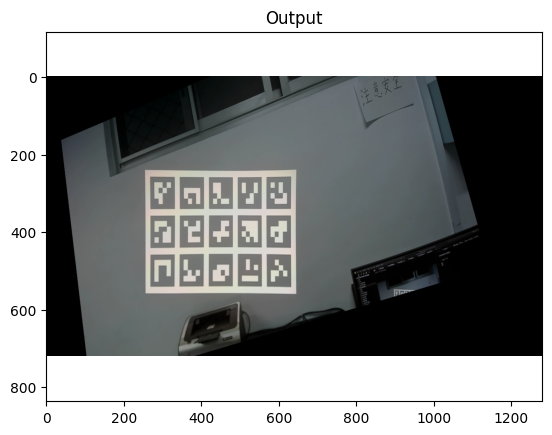

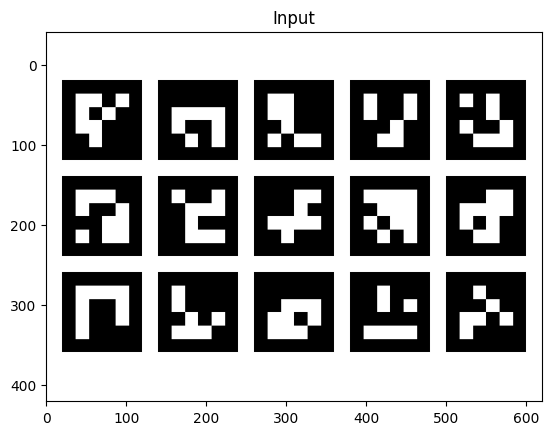

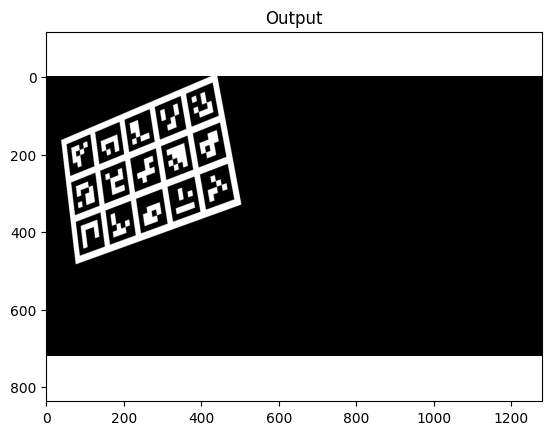

In [ ]:
dst = cv2.warpPerspective(generated_aruco_img,M,(1280,720))
inputimg=cv2.imread('../Aruco/gc_0050.png')
re = cv2.warpPerspective(inputimg, M, (width, height))

def check2(img, img2):
	plt.imshow(img),plt.title('Input')
	plt.axis('equal')
	plt.show()
	plt.imshow(img2),plt.title('Output')
	plt.axis('equal')
	plt.show()
check2(generated_aruco_img,dst)
check2(inputimg, re)